In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from multiprocessing import Pool

In [2]:
def simulate(G, H, trialtime, threshG, N):    
    results = np.zeros([trialtime])
    #redun_connections= np.ones([trialtime])
    #timetaken = np.zeros([trialtime])
    nodeset = set(range(N))
    infected = set()
    for t in range(trialtime):
        results[t] = len(infected)
        if t> trialtime/2 :
            if results[t] == results[t-1]:
                results[range(t+1, trialtime)] = results[t]
                break
        
        temphold = set()
        
        for node in nodeset-infected:
            neighG = {n for n in G.neighbors(node)}
            neighH = {n for n in H.neighbors(node)}

            if threshG[node] < 0 or len(infected.intersection(neighG)) > threshG[node]*len(neighG) and len(infected.intersection(neighH)) > 0:
                temphold.update({node})
        
        infected.update(temphold)
    return results
    

In [5]:
def comm_network(G, n_swap, N):
    H = G.copy()
    H = nx.double_edge_swap(H, n_swap, max_tries=n_swap*N);
    return H

In [1]:
def finalfraction(G, H, trialtime, threshG, N):    
    nodeset = set(range(N))
    infected = set()
    for t in range(trialtime):
        
        
        temphold = set()
        
        for node in nodeset-infected:
            neighG = {n for n in G.neighbors(node)}
            neighH = {n for n in H.neighbors(node)}

            if threshG[node] < 0 or (len(infected.intersection(neighG)) > threshG[node]*len(neighG) and len(infected.intersection(neighH)) > 0):
                temphold.update({node})
    
        if len(temphold) == 0:
            break
        else: 
            infected.update(temphold)
    return len(infected)
    

In [5]:
#This is maximum edge swap, uncorrelated degrees
def go(z):
    finesse=26
    N = 10000
    p = z/N
    trialnumber = 5
    trialtime = 25
    sigma = 0.2
    results = np.zeros([finesse])
    for T in range(trialnumber):
        G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
        H = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)       
        for n in range(finesse):
            threshG = np.random.normal(n*0.5/finesse, sigma, N)
            results[n] = results[n] + finalfraction(G, H, trialtime, threshG, N)
    return results/N/trialnumber


In [6]:
#This is maximum edge swap, uncorrelated degrees
def go_edge(z):
    finesse=26
    N = 1000
    p = z/N
    trialnumber = 10
    trialtime = 25
    sigma = 0.2

    G = nx.fast_gnp_random_graph(N, p, seed=None, directed=False)
    H = comm_network(G, G.number_of_edges()+N, N)
    results = np.zeros([finesse])
    
    for T in range(trialnumber):     
        for n in range(finesse):
            threshG = np.random.normal(n*0.5/finesse, sigma, N)
            results[n] = results[n] + finalfraction(G, H, trialtime, threshG, N)
    return results/N/trialnumber


In [11]:
infectionsize_edge = np.zeros([20, 26])
for n in range(1,21):
    z = n/2
    pool= Pool(3)
    results_edge= pool.map(go_edge, [z]*3)
    infectionsize_edge[n-1] = np.asarray(sum(results_edge), dtype=float)/3
filename = 'ER_hetero_dge.npy'
np.save(filename, infectionsize_edge)

In [9]:
trial_results = go_edge(10)


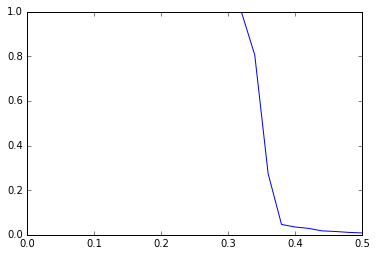

In [10]:
plt.plot(np.arange(26)*0.5/25, trial_results)

In [12]:
trial_results

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [21]:
for r in range(21):
    plt.plot(np.arange(21)*0.4/20, infectionsize[r])


NameError: name 'infectionsize' is not defined

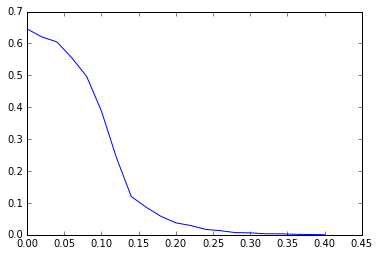

In [21]:
plt.plot(np.arange(21)*0.4/20, infectionsize[4]*10)

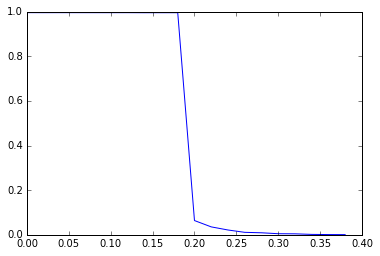

In [20]:
plt.plot(np.arange(20)*0.4/20, infectionsize)


In [22]:
np.linspace(0, 10, 21)

array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
         4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ])

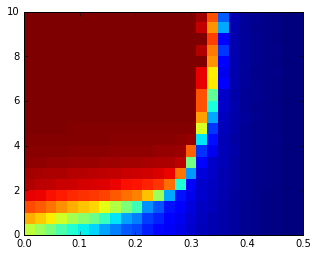

In [12]:
fig, ax = plt.subplots(1,1)
ax.imshow(((infectionsize_edge)[::-1])*10, interpolation='nearest', extent=[0,0.5, 0,10] )
ax.set_aspect(1/25)
plt.show()

NameError: name 'infectionsize_edge' is not defined

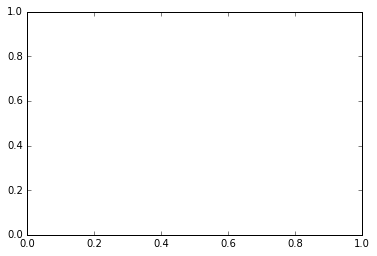

In [3]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(((infectionsize_edge)[::-1]), interpolation='nearest', extent=[0,0.5, 0.5,10], vmin=0, vmax=1)
plt.colorbar(im)
ax.set_aspect(1/20)
plt.title('contact social layer edge swap')
plt.xlabel('r')
plt.ylabel('z')
plt.show()
#fig.savefig('/home/user/Desktop/MP_doc_templates/figures/hetero_edge_swap_ER.eps')

In [1]:
infectionsize

NameError: name 'infectionsize' is not defined

In [31]:
infectionsize_node.astype('float32').tofile('hetero_node_swap_sim.dat')

In [32]:
np.save('hetero_node_swap_sim.npy', infectionsize_node)

In [33]:
infectionsize_node

array([[ 0.4997    ,  0.46428   ,  0.42118   ,  0.38558   ,  0.35164   ,
         0.3143    ,  0.28286   ,  0.24956   ,  0.22136   ,  0.19092   ,
         0.16556   ,  0.14506   ,  0.12476   ,  0.10384   ,  0.08738   ,
         0.07194   ,  0.06182   ,  0.05102   ,  0.04228   ,  0.03344   ,
         0.0282    ,  0.02202   ,  0.01674   ,  0.01306   ,  0.0108    ,
         0.00764   ],
       [ 0.52650667,  0.48880667,  0.44358667,  0.40603333,  0.36954667,
         0.32968667,  0.29571333,  0.26009333,  0.23011333,  0.19779333,
         0.17119333,  0.1492    ,  0.12801333,  0.10602   ,  0.0891    ,
         0.07299333,  0.06263333,  0.0516    ,  0.04267333,  0.0337    ,
         0.02832   ,  0.02208667,  0.01678   ,  0.0131    ,  0.01083333,
         0.00764667],
       [ 0.60032667,  0.5599    ,  0.50914667,  0.46818667,  0.42606   ,
         0.37944667,  0.3381    ,  0.29638   ,  0.25786   ,  0.21886   ,
         0.18691333,  0.16170667,  0.13721333,  0.11247333,  0.09335333,
       

In [4]:
infectionsize_edge

NameError: name 'infectionsize_edge' is not defined